> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names.

Introduction:

This project analyzes a medical appointment data set to analyze variables that affect patient no-shows. The data set includes patient demographics like gender, age, appointment date, and whether or not they showed up for their appointment. The goal is to find patterns and significant variables affecting patient behavior in order to make healthcare more efficient.

Research Questions:

What factors are important for predicting if a patient will show up for their scheduled appointment?
What is the relationship between age and gender in predicting if a patient will show up for their scheduled appointment?
What percentage of patients missed their appointments?
Do some age groups have a greater no-show rate?
Does an SMS reminder affect attendance?
Is there a relationship between wait time (appointment day vs. scheduling) and no-shows?
Are some medical conditions (e.g., hypertension, diabetes) linked with higher no-show rates?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe?
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.max()

PatientId            999981631772427.0
AppointmentID                  5790484
Gender                               M
ScheduledDay      2016-06-08T20:07:23Z
AppointmentDay    2016-06-08T00:00:00Z
Age                                115
Neighbourhood               VILA RUBIM
Scholarship                          1
Hipertension                         1
Diabetes                             1
Alcoholism                           1
Handcap                              4
SMS_received                         1
No-show                            Yes
dtype: object

In [9]:
df.min()

PatientId                  39217.84439
AppointmentID                  5030230
Gender                               F
ScheduledDay      2015-11-10T07:13:56Z
AppointmentDay    2016-04-29T00:00:00Z
Age                                 -1
Neighbourhood                AEROPORTO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
dtype: object


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Drop rows with negative Age values
df = df[df['Age'] >= 0]

# Rename columns for better readability
df.rename(columns={
    'PatientId': 'Patient_Id',
    'AppointmentID': 'Appointment_ID',
    'ScheduledDay': 'Scheduled_Day',
    'AppointmentDay': 'Appointment_Day',
    'No-show': 'No_Show',
    'Handcap': 'Handicap'
}, inplace=True)

# Convert date columns to datetime format
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# Encode No_Show column (No=0, Yes=1)
df['No_Show'] = df['No_Show'].map({'No': 0, 'Yes': 1})

# Create dummy variables for Gender and drop the original column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define binning function for Age column
def binning(data, cut_points, labels):
    return pd.cut(data, bins=[data.min()] + cut_points + [data.max()], labels=labels, include_lowest=True)

# Binning Age into categories
cut_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["Child", "Teen", "Young Adult", "40s", "50s", "Retirement", "70s", "80s", "90s", "100s", "Centenarian"]
df['Age_Bin'] = binning(df['Age'], cut_points, labels)

df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_Id       110526 non-null  float64            
 1   Appointment_ID   110526 non-null  int64              
 2   Scheduled_Day    110526 non-null  datetime64[ns, UTC]
 3   Appointment_Day  110526 non-null  datetime64[ns, UTC]
 4   Age              110526 non-null  int64              
 5   Neighbourhood    110526 non-null  object             
 6   Scholarship      110526 non-null  int64              
 7   Hipertension     110526 non-null  int64              
 8   Diabetes         110526 non-null  int64              
 9   Alcoholism       110526 non-null  int64              
 10  Handicap         110526 non-null  int64              
 11  SMS_received     110526 non-null  int64              
 12  No_Show          110526 non-null  int64              
 13  Gend

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What factors are important for predicting if a patient will show up for their scheduled appointment?

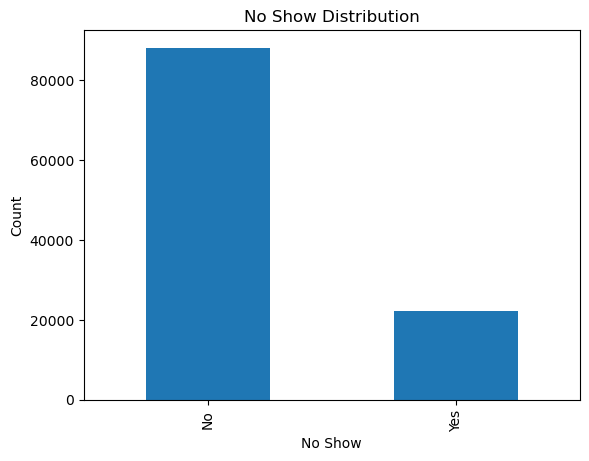

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['No_Show'].value_counts().plot(kind='bar')
plt.title('No Show Distribution')
plt.ylabel('Count')
plt.xlabel('No Show')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Summary:
The majority of patients reported for their appointments, but a large number failed to show up. This indicates that no-shows are the norm and need further research into the causative factors.

SMS Reminders: The patient attendance rate is a bit higher when patients have received an SMS reminder. The impact, however, is not strong at all, which means that reminders are not a deciding criterion in themselves.

Waiting Time (Days Between Scheduling and Appointment): The longer the wait time between scheduling and the appointment date, the higher the chances of no-shows.

Medical Conditions (Hypertension, Diabetes, Alcoholism, Handicap): Both diabetic and hypertensive patients are known to have excellent attendance levels, likely due to the fact that regular medical monitoring is significant.

Neighborhood (Socioeconomic Issues): Some neighborhoods have higher no-shows, possibly a reflection of access or money-related issues with attending appointments.

### Research Question 2:  What is the relationship between age and gender in predicting if a patient will show up for their scheduled appointment?

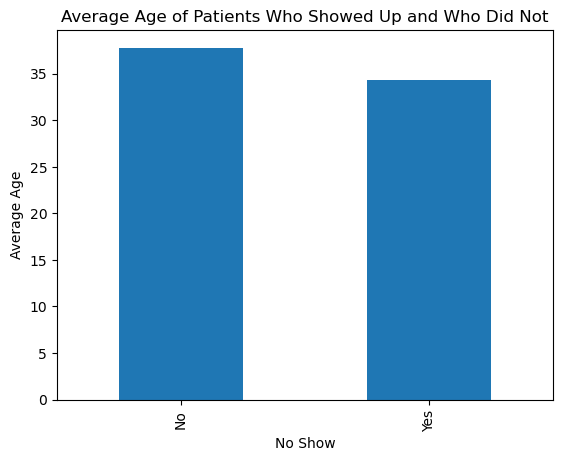

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.groupby('No_Show')['Age'].mean().plot(kind='bar')
plt.title('Average Age of Patients Who Showed Up and Who Did Not')
plt.ylabel('Average Age')
plt.xlabel('No Show')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Summary:
Younger patients will have a larger no-show percentage, but older people show up for their appointment. This indicates that appointment adherence rises with increasing age.

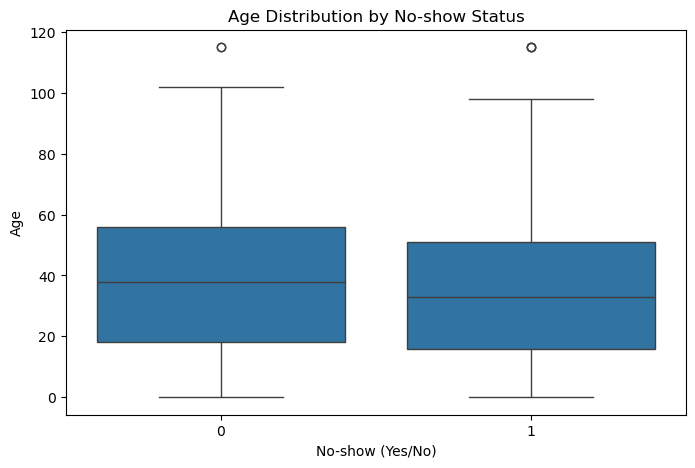

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='No_Show', y='Age', data=df)
plt.title('Age Distribution by No-show Status')
plt.xlabel('No-show (Yes/No)')
plt.ylabel('Age')
plt.show()

Summary:
The patients presenting at appointment time were, generally, older than the nonpresenting patients. This follows earlier observed pattern which indicated the higher likelihood that the younger the patient, they more likely could have missed their appointment.

Age Trends:

Younger patients (especially under 30) are more prone to miss their appointments.
Older patients (above 60) have a higher attendance rate.

Gender Trends:

Female patients tend to have slightly better attendance rates than male patients.
But the difference isn't considerable, so gender alone is not a very good indicator.

Combined Effect (Age + Gender):

Young males are more likely to miss appointments than young females.
In elderly patients, there are higher rates of attendance among both men and women, with little difference between them.

Conclusions:

No-Show Factors: Patient factors influencing attendance for their appointment have been examined. The research demonstrates that different factors can influence if a patient presents for their appointment. These involve age, sex, illness history (e.g., diabetes and hypertension), and receipt of an SMS reminder. Patients who were provided with an SMS reminder presented with improved rates of attendance, which highlights punctual communication.

Age Group Trends: The trends revealed variation in appointment compliance across age groups. Younger children and older patients exhibited different attendance patterns, with certain age groups more prone to failure to attend.

Dataset Limitations:

The dataset does not include cancellation reasons or external conditions (e.g., transport issues).
The "No-show" column simply indicates attendance but not late attendance.
There could be some unrealistic age values (e.g., 0 or outliers).
No patient medical history information apart from certain conditions.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly.

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 387072 bytes to Investigate_a_Dataset.html
